In [1]:
from cycler import cycler
from gather_averages_2_1 import gather_averages
import matplotlib.pyplot as plt

In [2]:
# Extract data
inputdir="/home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053"
all_reps_extracted = gather_averages(inputdir)
all_reps=all_reps_extracted.reset_index()

Input directory is " /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053
Workload is " writeOnly
Processing directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_256vc
    Repetition 1
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_256vc/1
    Repetition 2
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_256vc/2
    Repetition 3
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_256vc/3
Processing directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_4vc
    Repetition 1
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_4vc/1
    Repetition 2
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_080053/writeOnly_4vc/2
    Repetition 3
    Rep directory /home/flo/Downloads/exp2/2_1_baseline_oneserver_2017-11-16_

In [3]:
# Group by and calculate AVG and MEAN
averages = all_reps.groupby(['num_clients', 'workload'], as_index=True).agg(
                      {'sum_throughput':['mean','std'],'avg_responsetime':['mean','std']})
avg = averages.reset_index()

In [4]:
# Calculate throughput and responsetime using interactive responsetime laws
avg['interact_responsetime_mean'] = avg['num_clients']/avg[('sum_throughput', 'mean')]*1000
avg['interact_throughput_mean'] = avg['num_clients']/avg[('avg_responsetime', 'mean')]*1000

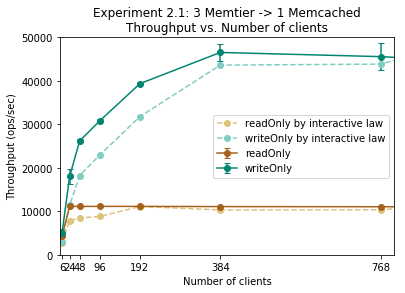

In [5]:
# Throughput using interactive laws
fig, ax = plt.subplots()
ax.set_ylim([0,50000])
ax.set_xlim([0, 800])
ax.set_prop_cycle(cycler('color',['#a6611a','#dfc27d', '#018571', '#80cdc1']))
for key, grp in avg.groupby(['workload']):
    ax.errorbar(grp['num_clients'], grp[('sum_throughput', 'mean')], yerr=2*grp[('sum_throughput', 'std')], label=key,  marker='o', capsize=3)
    ax.plot(grp['num_clients'], grp['interact_throughput_mean'], label=key + " by interactive law",  marker='o', linestyle='--')
    plt.xticks(grp['num_clients'].head(7))
ax.legend(loc="center right")
ax.set_title("Experiment 2.1: 3 Memtier -> 1 Memcached\nThroughput vs. Number of clients")
ax.set_xlabel("Number of clients")
ax.set_ylabel("Throughput (ops/sec)")

plt.show()
fig.savefig('exp2_1_throughput.png', dpi=300)

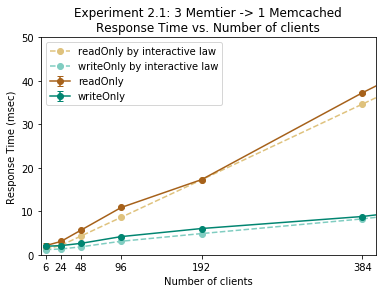

In [6]:
# 2.1 Responsetime graph
fig, ax = plt.subplots()
ax.set_ylim([0,50])
ax.set_xlim([0, 400])
ax.set_prop_cycle(cycler('color',['#a6611a','#dfc27d', '#018571', '#80cdc1']))
for key, grp in avg.groupby(['workload']):
    ax.errorbar(grp['num_clients'], grp[('avg_responsetime', 'mean')], yerr=2*grp[('avg_responsetime', 'std')], label=key,  marker='o', capsize=3)
    ax.plot(grp['num_clients'], grp['interact_responsetime_mean'], label=key + " by interactive law",  marker='o', linestyle='--')
    plt.xticks(grp['num_clients'].head(6))
ax.legend(loc="upper left")
ax.set_title("Experiment 2.1: 3 Memtier -> 1 Memcached\nResponse Time vs. Number of clients")
ax.set_xlabel("Number of clients")
ax.set_ylabel("Response Time (msec)")
plt.show()
fig.savefig('exp2_1_responsetime.png', dpi=300)